In [1]:
%cd /Users/namir_oues/Documents/PhD/MDSubSampler
import mdss.protein_data as pd
import mdss.property as p
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.graph as g
import mdss.utilities as u
import tempfile
import os
import sys
from IPython.display import Image, display

/Users/namir_oues/Documents/PhD/MDSubSampler


/Users/namir_oues/.pyenv/versions/3.9.1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
trajectory_file = "data/input.xtc"
topology_file = "data/input.gro"
atom_selection = "resid 120:160"
strata_number = 200
size = 10
dissimilarity_measure = d.Bhattacharyya
temp_dir = tempfile.mkdtemp()

In [3]:
p_data = pd.ProteinData(trajectory_file,topology_file,config_parameters=None)
print(p_data)

In [4]:
p_property = gp.RMSD(p_data, atom_selection, fit=True)
print(p_property)

In [5]:
p_property.calculate_property()

In [6]:
sampler = s.UniformSampler(
            protein_property=p_property,
            protein_data=p_data,
            output_folder=temp_dir,
            file_prefix=None,
            strata_number=strata_number,
            dissimilarity_measure=dissimilarity_measure)
print(sampler)

In [7]:
sampled_property = sampler.sample(round(int(size) * p_data.n_frames / 100))
print(sampled_property)

In [8]:
print(temp_dir)
print(os.listdir(temp_dir))

/var/folders/m8/r77_hkt94w50_3m6b6qcwd780000gn/T/tmpadjy0cp8
[]


In [10]:
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='scen2',
    p_prop=p_property,
    s_prop=sampled_property,
    p_data=p_data,
    p=size,
    machine_learning=None,
)

In [11]:
u.plot_property(output_folder=temp_dir,
            file_prefix='scen2',
            p_prop=p_property,
            s_prop=sampled_property,
            p=size,)


<Figure size 432x288 with 0 Axes>

0 1.4744275129937738
366 1.59143542519017
1 1.6403449217202701
536 1.6588671378485005
29 1.6872463430482636
3 1.6939923090588904
32 1.7110401110195808
598 1.7238523269444865
471 1.7353808864355145
5 1.7418306177822853
26 1.7501208894670455
22 1.765510965503738
28 1.7700160581441124
569 1.7833170723018432
712 1.7890080288385204
458 1.7966169950739517
381 1.8045684574460619
14 1.8193994246403304
47 1.8271891328149552
570 1.836186542736266
599 1.8445309781849653
586 1.8602963285069811
21 1.868736877955756
20 1.874890229160361
267 1.8836792145017824
43 1.8963478998909364
490 1.898813338611842
373 1.91624642033088
574 1.920873252058512
609 1.9317485630801012
390 1.9404578370822427
107 1.9478485833831642
575 1.957339258498001
97 1.9684837294279103
573 1.977010942110411
614 1.9840890616531517
101 1.9935251203575073
419 2.0047476947994296
593 2.018724391178954
397 2.0247900623073867
660 2.0336540488036796
655 2.0399252918805324
551 2.056606053909467
326 2.059693698184261
432 2.0710331752429547

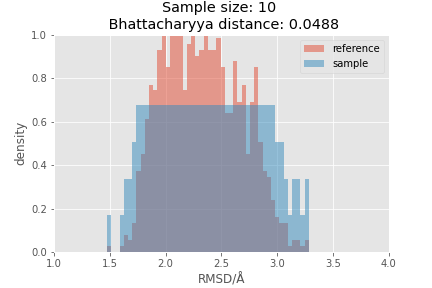

In [12]:
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        display(Image(filename=fpath))
    if ext == '.dat':
        with open(fpath, 'r') as file:
            contents = file.read()
            print(contents)  

['scen2_10_RMSD.dat', 'scen2_10_RMSD.npy', 'scen2_10_RMSD_plot.png', 'scen2_10_RMSD.xtc']
